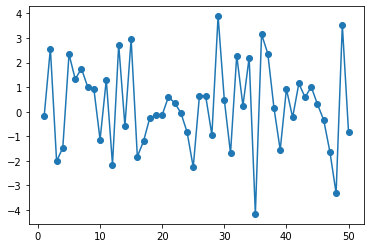

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

noise = 2 * np.random.randn(50)
xs = np.arange(1, 51)
plt.plot(xs, noise)
plt.scatter(xs, noise)



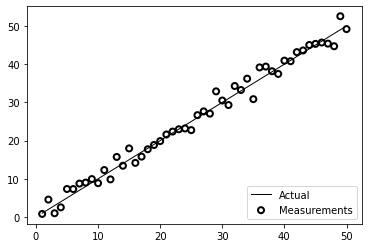

In [3]:
plt.plot(xs, xs, c='k', lw=1, label='Actual')
plt.scatter(xs, xs+noise, marker='o', edgecolor='k', facecolor='none', lw=2, label='Measurements')
plt.legend(loc=4)
#


In [4]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '𝒩(μ={:.3f}, 𝜎²={:.3f})'.format(s[0], s[1])

g1 = gaussian(3.4, 10.1)
g2 = gaussian(mean=4.5, var=0.2**2)

def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

def update(prior, likelihood):
    posterior = gaussian_multiply(likelihood, prior)
    return posterior

# test the update function
predicted_pos = gaussian(10., .2**2)
measured_pos = gaussian(11., .1**2)
estimated_pos = update(predicted_pos, measured_pos)
estimated_pos

𝒩(μ=10.800, 𝜎²=0.008)

𝒩(μ=10.000, 𝜎²=0.500)


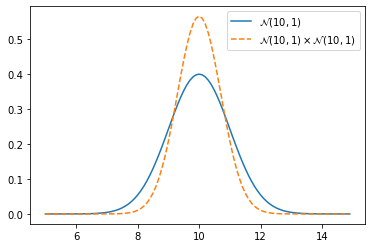

In [5]:
import math
def gaussian_fcn(x, mean, var, normed=True):
    pdf = ((2*math.pi*var)**-.5) * np.exp((-0.5*(np.asarray(x)-mean)**2.) / var)
    if normed and len(np.shape(pdf)) > 0:
        pdf = pdf / sum(pdf)

    return pdf

z = gaussian(10., 1.)  # Gaussian N(10, 1)

product = gaussian_multiply(z, z)

xs = np.arange(5, 15, 0.1)
ys = [gaussian_fcn(x, z.mean, z.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1)$')

ys = [gaussian_fcn(x, product.mean, product.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1) \\times \mathcal{N}(10,1)$', ls='--')
plt.legend()
print(product)

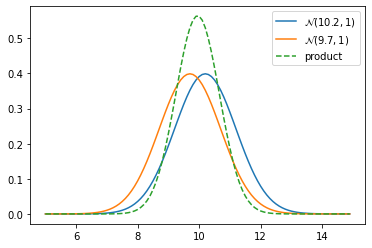

In [6]:
def plot_products(g1, g2):
    plt.figure()
    product = gaussian_multiply(g1, g2)

    xs = np.arange(5, 15, 0.1)
    ys = [gaussian_fcn(x, g1.mean, g1.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$'+'$({},{})$'.format(g1.mean, g1.var))

    ys = [gaussian_fcn(x, g2.mean, g2.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$'+'$({},{})$'.format(g2.mean, g2.var))

    ys = [gaussian_fcn(x, product.mean, product.var) for x in xs]
    plt.plot(xs, ys, label='product', ls='--')
    plt.legend();

z1 = gaussian(10.2, 1)
z2 = gaussian(9.7, 1)

plot_products(z1, z2)

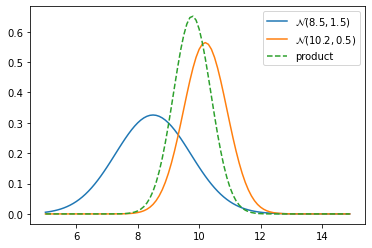

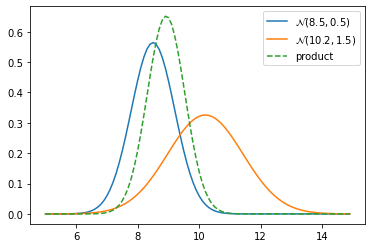

In [7]:
prior, z = gaussian(8.5, 1.5), gaussian(10.2, 0.5)
plot_products(prior, z)

prior, z = gaussian(8.5, 0.5), gaussian(10.2, 1.5)
plot_products(prior, z)